In [1]:
# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

# Our numerical workhorses
import numpy as np
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import xlwt
from heapq import *
import matplotlib.pyplot as plt
import heapq

from EM import *
from cleaningData import *

In [3]:
df = pd.read_csv("NIPS_1987-2015.csv", sep=',', index_col = 0)
df.shape
dfTranspose = df.transpose()

In [ ]:
def serialize(object,fichier):
    pickle.dump(object, file(fichier,'w'))

def deserialize(fichier):
    return pickle.load(file(fichier))



In [5]:
#dfTranspose = stemWordsFromInitialDictionary(dfTranspose)

In [6]:
dfTranspose.shape

(5811, 11463)

df - columns correspond to articles labels / rows correspond to the dictionary of words
dfTranspose - the opposite

In [7]:
B = 300
#R = 0
data = extractSubDictionaryBasedOnProportions(dfTranspose, B)

KeyboardInterrupt: 

In [43]:
data.shape

(5811, 300)

In [44]:
n = float(data.sum().sum())
n
indexes = nullArticlesIndexes(data)
data.drop(data.index[indexes], inplace = True)

2452
3277
4062
4099
4204
4228
5595


In [45]:
thresholdConvergence = 1
epsilonForInitialization = .01
deltaInit = 0
L = len(data)
B = data.shape[1]
K = 31
#dataClean = dataClean.values
dataClean = data.values

In [46]:
print ("NEW NUMBER OF CLUSTERS : " , K)
P,Pi,Rpost,logScore,logScores = expectationMaximisation2(dataClean, K, L, B, thresholdConvergence,  epsilonForInitialization, 200)

NEW NUMBER OF CLUSTERS :  15
1-th short run of EM
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
('Initial logScore: ', -223514921.03115922)
E-step ...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of

In [47]:
articles = data.index.values.tolist()  # an ndarray method, you probably shouldn't depend on this

In [48]:
dictionary = list(data.columns.values)

In [49]:
PAsDf = pd.DataFrame(P, columns = dictionary)

In [50]:
PAsDf

,use,model,learn,algorithm,set,function,data,comput,network,result,...,separ,left,procedur,close,covari,exact,transform,match,lead,squar
0,1.962142e-02,2.004682e-02,9.386257e-03,2.090224e-02,1.605956e-02,1.125247e-02,9.936058e-03,1.224548e-02,9.981584e-03,9.149817e-03,...,1.713352e-03,1.380810e-03,1.887069e-03,1.531110e-03,1.127923e-03,3.067712e-03,7.622899e-04,2.337534e-03,1.515959e-03,7.514493e-04
1,1.859935e-02,1.058566e-02,2.388489e-02,9.453446e-03,1.046656e-02,1.836637e-02,5.914795e-03,1.099481e-02,3.982483e-02,9.179633e-03,...,1.717361e-03,1.141520e-03,1.417341e-03,1.249300e-03,4.972749e-04,1.292948e-03,1.216232e-03,7.355314e-04,1.368536e-03,1.806844e-03
2,2.237922e-02,3.656739e-02,1.092926e-02,1.050694e-02,1.137723e-02,1.120630e-02,1.895089e-02,9.342949e-03,4.079838e-03,7.824579e-03,...,1.658160e-03,1.591261e-03,1.705230e-03,1.499060e-03,4.061451e-03,1.727060e-03,1.582667e-03,1.005340e-03,1.613896e-03,1.535439e-03
3,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,...,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100
4,2.105054e-02,1.408546e-02,2.532684e-02,2.114224e-02,1.455318e-02,1.967162e-02,3.405944e-03,9.157051e-03,2.584050e-03,9.292675e-03,...,6.314998e-04,1.124351e-03,9.811410e-04,1.510817e-03,3.790400e-04,1.440838e-03,4.267152e-04,7.864080e-04,1.416862e-03,1.427501e-03
5,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,...,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100
6,2.182037e-02,8.472575e-03,2.066701e-02,1.757421e-02,1.841889e-02,1.332144e-02,1.909159e-02,9.357286e-03,1.386895e-03,9.340436e-03,...,1.865684e-03,1.199228e-03,1.602821e-03,1.609673e-03,1.041327e-03,1.054433e-03,1.798871e-03,1.127816e-03,1.647994e-03,1.537773e-03
7,3.891051e-03,7.782101e-03,1.000000e-100,1.000000e-100,1.556420e-02,1.000000e-100,1.000000e-100,1.167315e-02,6.809339e-02,5.836576e-03,...,1.000000e-100,1.361868e-02,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.945525e-03,1.000000e-100,3.891051e-03,5.836576e-03
8,2.630582e-02,3.552121e-02,1.594036e-02,7.207247e-03,1.390682e-02,5.886644e-03,1.116750e-02,9.623221e-03,4.174295e-03,8.990221e-03,...,1.196266e-03,2.065684e-03,1.238773e-03,1.117174e-03,5.963377e-04,8.043733e-04,2.685590e-03,3.602749e-03,1.043749e-03,7.417242e-04
9,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,...,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100


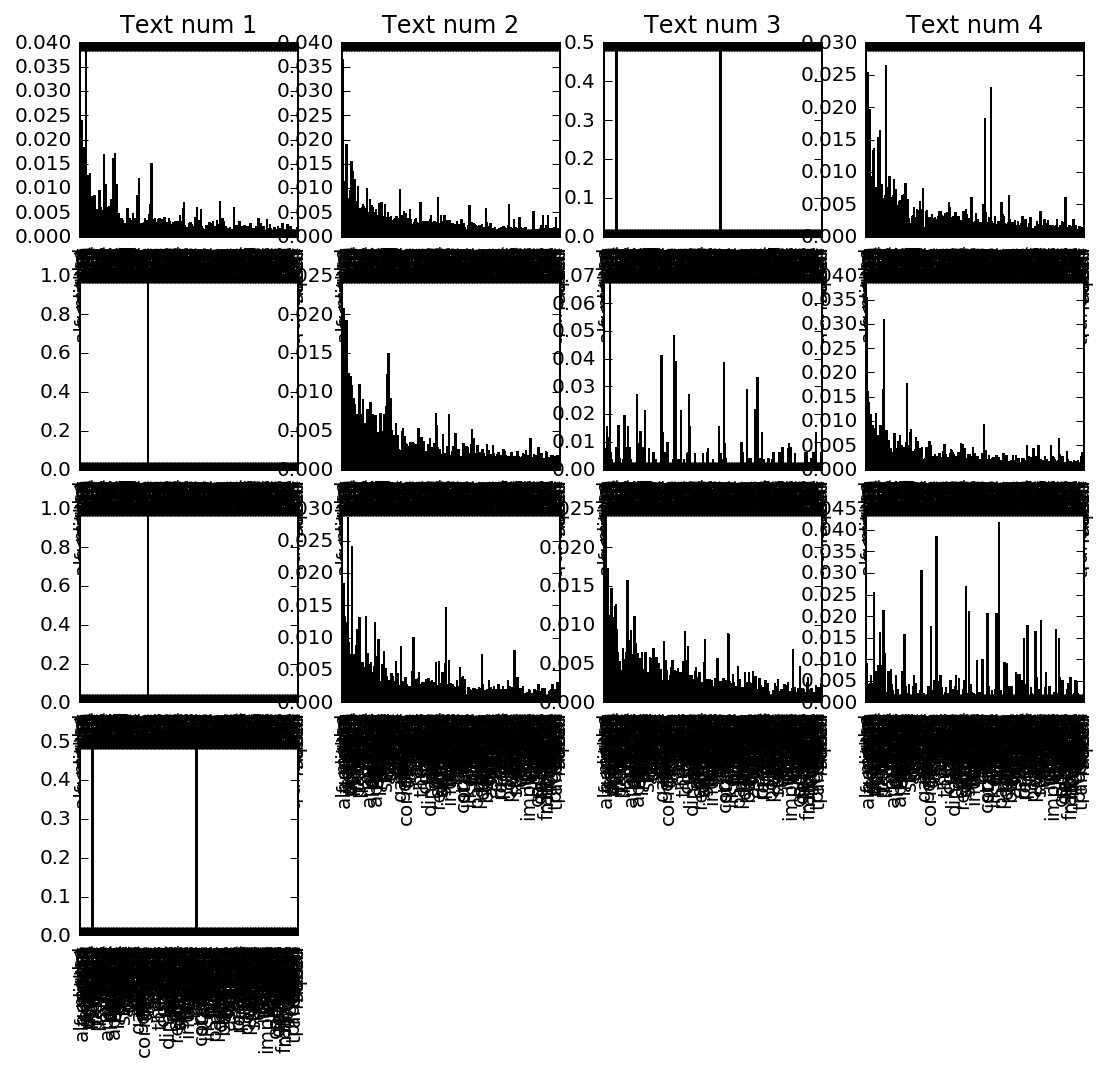

In [51]:
fig = plt.figure(1, figsize=(9,8))

for k in range(1, 14):
    fig.add_subplot(4,4,k)
    PAsDf.ix[k,].plot.bar()
    plt.axhline(0, color='k')
    plt.title("Text num " + str(k))

In [52]:
groups = np.argmax(Rpost, axis=1)

In [53]:
groups = [list(groups)]

In [54]:
textGroups = pd.DataFrame(groups, columns = articles)

In [55]:
textGroups

,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,1987_10,...,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,1,1,1,1,1,1,14,1,14,14,...,11,11,11,4,11,11,4,4,11,2


In [56]:
numberOfArticlesByYear = []
for i in range(1987,2016):
    #print(i)
    j = 0
    for l in list(textGroups):
        if str(i) == l[0:4]:
            j+=1
    numberOfArticlesByYear.append(j)

In [57]:
articlesGroupedByYear = []
clustersGroupedByYear = []
RpostGroupedByYear = []
for i in range(1987,2016):
    oneYearArticles = []
    oneYearClusters = []
    oneYearRpost = []
    j = 0
    for l in list(textGroups):
        if str(i) == l[0:4]:
            oneYearArticles.append(l)
            oneYearClusters.append(groups[0][j])
            oneYearRpost.append(Rpost[j])
        j+=1
    articlesGroupedByYear.append(oneYearArticles)
    clustersGroupedByYear.append(oneYearClusters)
    RpostGroupedByYear.append(oneYearRpost)

In [58]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

In [64]:
for i in range(len(clustersGroupedByYear)):
    print(Most_Common(clustersGroupedByYear[i]))

1
1
1
1
1
1
1
1
1
1
23
4
4
4
4
4
0
0
4
4
4
4
4
26
4
4
7
7
7


In [59]:
mostUsedWordsAccrossClusters = []
for i in range(len(P)):
    indexes = heapq.nlargest(30, range(len(P[i])), P[i].take)
    mostUsedWordsAccrossClusters.append([dictionary[u] for u in indexes])

In [60]:
mostUsedWordsAccrossClusters

[['algorithm',
  'model',
  'graph',
  'use',
  'set',
  'node',
  'tree',
  'comput',
  'function',
  'variabl',
  'problem',
  'network',
  'data',
  'distribut',
  'learn',
  'time',
  'result',
  'structur',
  'cluster',
  'method',
  'edg',
  'number',
  'sampl',
  'random',
  'approxim',
  'estim',
  'bound',
  'given',
  'probabl',
  'optim'],
 ['network',
  'learn',
  'use',
  'function',
  'weight',
  'input',
  'neural',
  'unit',
  'train',
  'time',
  'output',
  'comput',
  'error',
  'system',
  'model',
  'set',
  'state',
  'algorithm',
  'result',
  'valu',
  'neuron',
  'figur',
  'problem',
  'number',
  'general',
  'hidden',
  'perform',
  'layer',
  'activ',
  'vector'],
 ['model',
  'use',
  'data',
  'distribut',
  'estim',
  'sampl',
  'set',
  'function',
  'learn',
  'paramet',
  'algorithm',
  'method',
  'process',
  'gaussian',
  'time',
  'comput',
  'prior',
  'result',
  'approxim',
  'number',
  'figur',
  'variabl',
  'infer',
  'observ',
  'posterior

In [61]:
clustersGroupedByYear

[[1,
  1,
  1,
  1,
  1,
  1,
  14,
  1,
  14,
  14,
  1,
  14,
  1,
  1,
  10,
  14,
  1,
  10,
  1,
  14,
  14,
  1,
  1,
  1,
  1,
  14,
  14,
  14,
  14,
  1,
  14,
  14,
  1,
  1,
  14,
  1,
  1,
  1,
  14,
  14,
  10,
  1,
  14,
  1,
  1,
  1,
  1,
  14,
  14,
  1,
  14,
  1,
  1,
  10,
  1,
  1,
  10,
  1,
  14,
  1,
  1,
  1,
  1,
  1,
  10,
  1,
  4,
  1,
  14,
  1,
  14,
  1,
  14,
  14,
  14,
  10,
  1,
  1,
  10,
  8,
  1,
  14,
  10,
  1,
  1,
  14,
  8,
  1,
  1,
  14],
 [1,
  10,
  1,
  1,
  1,
  10,
  1,
  1,
  1,
  1,
  0,
  10,
  1,
  1,
  10,
  1,
  1,
  1,
  1,
  1,
  1,
  14,
  14,
  10,
  10,
  10,
  1,
  1,
  10,
  1,
  10,
  10,
  10,
  14,
  8,
  10,
  10,
  10,
  10,
  10,
  14,
  1,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  1,
  14,
  1,
  14,
  14,
  14,
  1,
  10,
  1,
  1,
  10,
  1,
  1,
  1,
  14,
  1,
  14,
  6,
  2,
  1,
  14,
  8,
  1,
  1,
  10,
  1,
  14,
  1,
  14,
  1,
  14,
  14,
  14,
  14,
  10,
  1,
  1,
  1,
  1,
  1,
  14,
  14,
  14

In [62]:
clusterSetsGroupedByYear =[]
for i in range(len(clustersGroupedByYear)):
    clusterSetsGroupedByYear.append(set(clustersGroupedByYear[i]))

In [63]:
clusterSetsGroupedByYear

[{1, 4, 8, 10, 14},
 {0, 1, 2, 6, 8, 10, 14},
 {0, 1, 2, 4, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 7, 8, 10, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 12, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 5, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 7, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 3, 4, 6, 8, 10, 11, 14},
 {0, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 12, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14},
 {0, 1, 2, 4, 6, 8, 10, 11, 14}]

In [64]:
Pi

array([[  9.42786238e-02],
       [  9.58277452e-02],
       [  1.62665489e-01],
       [  8.47993357e-05],
       [  8.47818577e-02],
       [  8.61474845e-05],
       [  1.30200307e-01],
       [  3.44589938e-04],
       [  9.18839662e-02],
       [  8.61474845e-05],
       [  8.85555567e-02],
       [  1.31054727e-01],
       [  3.44706797e-04],
       [  1.77209443e-05],
       [  1.19787616e-01]])

In [65]:
Rpost

array([[  1.66245984e-074,   1.00000000e+000,   9.95699570e-066, ...,
          0.00000000e+000,   0.00000000e+000,   1.73617715e-022],
       [  3.52361407e-270,   1.00000000e+000,   9.56682431e-196, ...,
          0.00000000e+000,   0.00000000e+000,   2.49347970e-053],
       [  1.29725229e-139,   1.00000000e+000,   5.00305174e-153, ...,
          0.00000000e+000,   0.00000000e+000,   2.44191766e-102],
       ..., 
       [  1.59300554e-129,   6.04134600e-257,   1.80658529e-220, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  3.60593789e-227,   1.35390404e-311,   1.84911194e-294, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  7.80713357e-108,   0.00000000e+000,   1.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000]])

In [66]:
np.mean(Rpost[0:90], axis = 0)

array([  1.92389798e-16,   5.44453499e-01,   7.29865777e-32,
         0.00000000e+00,   1.11111111e-02,   0.00000000e+00,
         9.52596357e-21,   0.00000000e+00,   2.22222222e-02,
         0.00000000e+00,   1.00000129e-01,   1.93970420e-14,
         0.00000000e+00,   0.00000000e+00,   3.22213038e-01])

In [67]:
Rpost.shape

(5804, 15)

In [68]:
RpostGroupedByYear

[[array([  1.66245984e-074,   1.00000000e+000,   9.95699570e-066,
           0.00000000e+000,   8.35005721e-081,   0.00000000e+000,
           2.51925692e-102,   0.00000000e+000,   1.05493103e-103,
           0.00000000e+000,   1.61421581e-066,   1.75581749e-080,
           0.00000000e+000,   0.00000000e+000,   1.73617715e-022]),
  array([  3.52361407e-270,   1.00000000e+000,   9.56682431e-196,
           0.00000000e+000,   2.42973262e-263,   0.00000000e+000,
           8.17947347e-289,   0.00000000e+000,   3.31186745e-235,
           0.00000000e+000,   3.49684700e-076,   1.00583047e-313,
           0.00000000e+000,   0.00000000e+000,   2.49347970e-053]),
  array([  1.29725229e-139,   1.00000000e+000,   5.00305174e-153,
           0.00000000e+000,   5.30017428e-212,   0.00000000e+000,
           3.67173405e-181,   0.00000000e+000,   3.27245793e-175,
           0.00000000e+000,   7.72952657e-078,   1.41576155e-190,
           0.00000000e+000,   0.00000000e+000,   2.44191766e-102]),
  ar

In [69]:
len(RpostGroupedByYear[0])

90

In [70]:
len(Rpost)

5804

In [71]:
groupAveragesOverYears = []
j = 0
for y in range(29):
    print (y)
    print (j, j + numberOfArticlesByYear[y])
    groupAveragesOverYears.append(np.mean(Rpost[j:(j + numberOfArticlesByYear[y])], axis = 0))
    j = j + numberOfArticlesByYear[y]
    print (j)
    
    
    

0
0 90
90
1
90 185
185
2
185 286
286
3
286 429
429
4
429 573
573
5
573 700
700
6
700 844
844
7
844 984
984
8
984 1136
1136
9
1136 1288
1288
10
1288 1439
1439
11
1439 1590
1590
12
1590 1740
1740
13
1740 1876
1876
14
1876 1978
1978
15
1978 2130
2130
16
2130 2327
2327
17
2327 2532
2532
18
2532 2739
2739
19
2739 2943
2943
20
2943 3160
3160
21
3160 3409
3409
22
3409 3671
3671
23
3671 3963
3963
24
3963 4264
4264
25
4264 4631
4631
26
4631 4991
4991
27
4991 5402
5402
28
5402 5804
5804


In [72]:
len(groupAveragesOverYears)

29

In [73]:
groupAveragesOverYears

[array([  1.92389798e-16,   5.44453499e-01,   7.29865777e-32,
          0.00000000e+00,   1.11111111e-02,   0.00000000e+00,
          9.52596357e-21,   0.00000000e+00,   2.22222222e-02,
          0.00000000e+00,   1.00000129e-01,   1.93970420e-14,
          0.00000000e+00,   0.00000000e+00,   3.22213038e-01]),
 array([  1.05263158e-02,   4.23174318e-01,   1.11691121e-02,
          0.00000000e+00,   2.77527643e-21,   0.00000000e+00,
          9.88351952e-03,   0.00000000e+00,   2.10526316e-02,
          0.00000000e+00,   2.18705803e-01,   7.11771526e-25,
          0.00000000e+00,   0.00000000e+00,   3.05488300e-01]),
 array([  1.97986382e-02,   4.09794907e-01,   9.90099010e-03,
          0.00000000e+00,   9.90099010e-03,   0.00000000e+00,
          1.45008777e-11,   0.00000000e+00,   2.97063111e-02,
          0.00000000e+00,   2.43790825e-01,   9.90099010e-03,
          0.00000000e+00,   0.00000000e+00,   2.67206348e-01]),
 array([ 0.0279261 ,  0.4076015 ,  0.00703878,  0.        ,  0.0

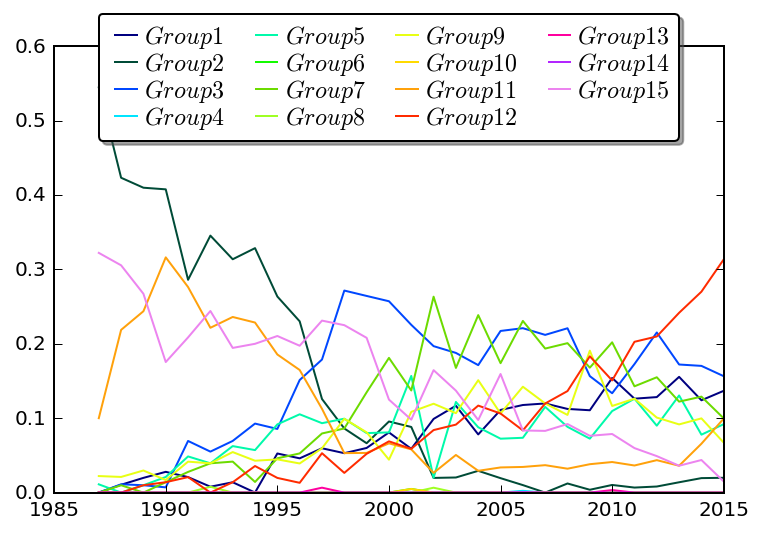

In [74]:
num_plots = K
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

# Have a look at the colormaps here and decide which one you'd like:
# http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

# Plot several different functions...
x = np.arange(1987,2016)
labels = []
for i in range(1, num_plots + 1):
    ax1.plot(x, [groupAveragesOverYears[y][i-1] for y in range(len(groupAveragesOverYears))])
    labels.append(r'$Group %i $'%i )

# I'm basically just demonstrating several different legend options here...
ax1.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.show()

In [75]:
mostUsedWordsAccrossClusters

[['algorithm',
  'model',
  'graph',
  'use',
  'set',
  'node',
  'tree',
  'comput',
  'function',
  'variabl',
  'problem',
  'network',
  'data',
  'distribut',
  'learn',
  'time',
  'result',
  'structur',
  'cluster',
  'method',
  'edg',
  'number',
  'sampl',
  'random',
  'approxim',
  'estim',
  'bound',
  'given',
  'probabl',
  'optim'],
 ['network',
  'learn',
  'use',
  'function',
  'weight',
  'input',
  'neural',
  'unit',
  'train',
  'time',
  'output',
  'comput',
  'error',
  'system',
  'model',
  'set',
  'state',
  'algorithm',
  'result',
  'valu',
  'neuron',
  'figur',
  'problem',
  'number',
  'general',
  'hidden',
  'perform',
  'layer',
  'activ',
  'vector'],
 ['model',
  'use',
  'data',
  'distribut',
  'estim',
  'sampl',
  'set',
  'function',
  'learn',
  'paramet',
  'algorithm',
  'method',
  'process',
  'gaussian',
  'time',
  'comput',
  'prior',
  'result',
  'approxim',
  'number',
  'figur',
  'variabl',
  'infer',
  'observ',
  'posterior

In [143]:
np.arange(1987,2016)

array([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [148]:
colormap.savefig()

AttributeError: 'LinearSegmentedColormap' object has no attribute 'savefig'

In [151]:
fig1.savefig('clustersOvertime.png')

# New Method of selecting common words

In [106]:
def extractSubDictionaryBasedOnProportions(dfTranspose, B):
    dictionary = list(dfTranspose)
    usedWords = []
    for word in dictionary:
        proportion = len(dfTranspose[dfTranspose[word]>0])/nbDoc
        #print (proportion)
        if proportion >0.1 and proportion <0.8:
        #print("Good proportion")
            usedWords.append(word)
    dfTranspose2 = dfTranspose[usedWords]
    wordOccurrences =  dfTranspose2.sum(0)
    wordOccurrences = wordOccurrences.nlargest(B)
    finalWords = list(wordOccurrences.index.values)
    data = dfTranspose2[finalWords]
    return data

In [108]:
data = extractSubDictionaryBasedOnProportions(dfTranspose, B)

In [109]:
thresholdConvergence = 1
epsilonForInitialization = .01
deltaInit = 0
L = len(data)
B = data.shape[1]
K = 15
#dataClean = dataClean.values
dataClean = data.values

In [110]:
print ("NEW NUMBER OF CLUSTERS : " , K)
P,Pi,Rpost,logScore,logScores = expectationMaximisation2(dataClean, K, L, B, thresholdConvergence,  epsilonForInitialization, 100)

NEW NUMBER OF CLUSTERS :  15
1-th short run of EM
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
('Initial logScore: ', -116650469.0849895)
E-step ...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 15, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of 

In [111]:
articles = data.index.values.tolist()  # an ndarray method, you probably shouldn't depend on this
dictionary = list(data.columns.values)

In [112]:
PAsDf = pd.DataFrame(P, columns = dictionary)

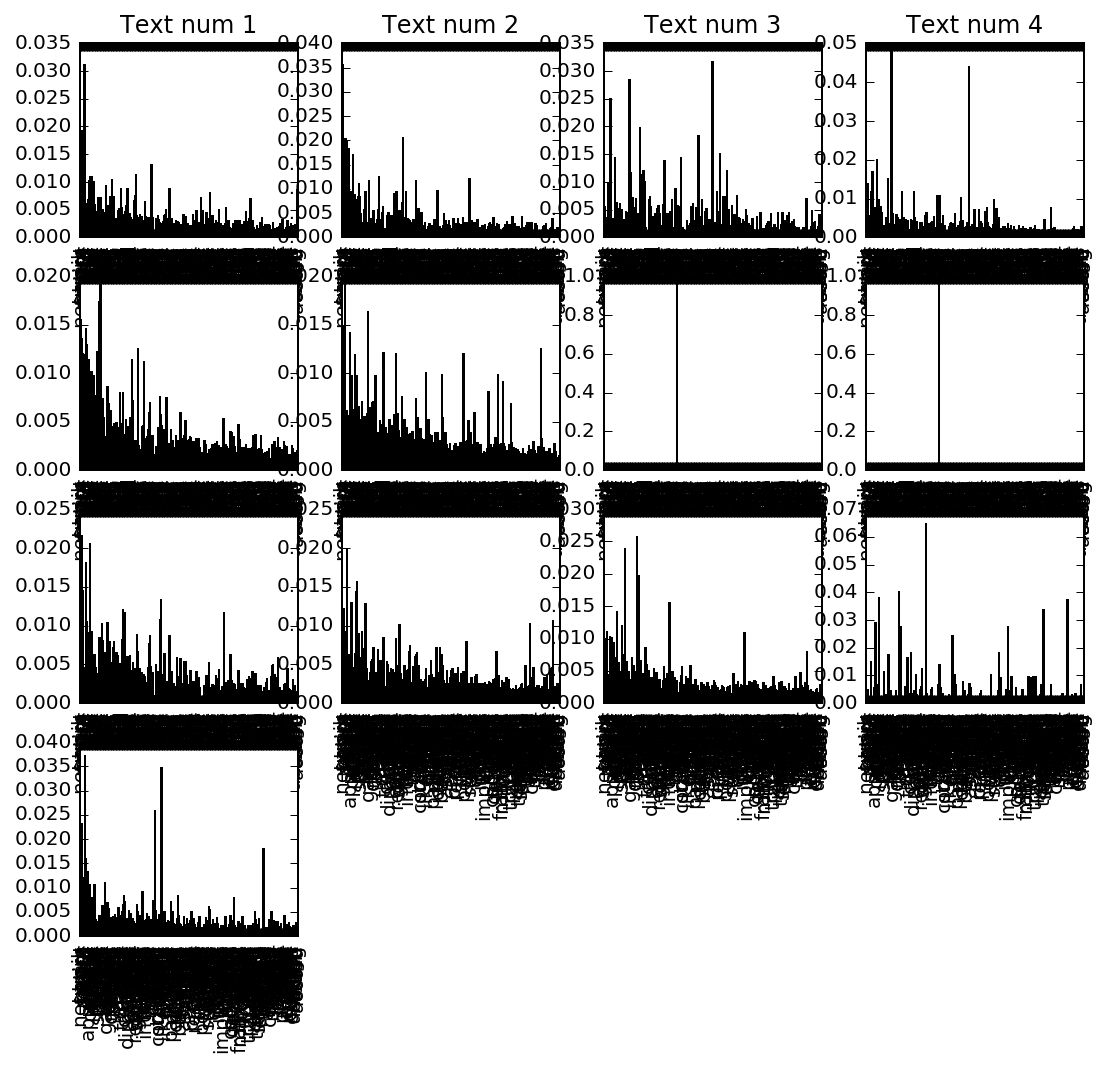

In [113]:
fig = plt.figure(1, figsize=(9,8))

for k in range(1, 14):
    fig.add_subplot(4,4,k)
    PAsDf.ix[k,].plot.bar()
    plt.axhline(0, color='k')
    plt.title("Text num " + str(k))

In [114]:
mostUsedWordsAccrossClusters = []
for i in range(len(P)):
    indexes = heapq.nlargest(30, range(len(P[i])), P[i].take)
    mostUsedWordsAccrossClusters.append([dictionary[u] for u in indexes])
    
    
mostUsedWordsAccrossClusters

[['imag',
  'object',
  'featur',
  'label',
  'train',
  'class',
  'detect',
  'segment',
  'classifi',
  'dataset',
  'cluster',
  'structur',
  'local',
  'part',
  'vector',
  'test',
  'classif',
  'recognit',
  'propos',
  'region',
  'visual',
  'kernel',
  'estim',
  'predict',
  'task',
  'sampl',
  'posit',
  'select',
  'match',
  'experi'],
 ['imag',
  'estim',
  'signal',
  'compon',
  'matrix',
  'linear',
  'local',
  'vector',
  'space',
  'gaussian',
  'map',
  'sourc',
  'dimension',
  'spars',
  'optim',
  'nois',
  'sampl',
  'code',
  'scale',
  'analysi',
  'natur',
  'statist',
  'measur',
  'filter',
  'structur',
  'kernel',
  'transform',
  'approxim',
  'featur',
  'train'],
 ['network',
  'train',
  'layer',
  'featur',
  'imag',
  'input',
  'neural',
  'unit',
  'recognit',
  'output',
  'word',
  'test',
  'vector',
  'classifi',
  'error',
  'hidden',
  'represent',
  'task',
  'classif',
  'weight',
  'object',
  'class',
  'predict',
  'pattern',
  'e

In [115]:
groupAveragesOverYears = []
j = 0
for y in range(29):
    print (y)
    print (j, j + numberOfArticlesByYear[y])
    groupAveragesOverYears.append(np.mean(Rpost[j:(j + numberOfArticlesByYear[y])], axis = 0))
    j = j + numberOfArticlesByYear[y]
    print (j)
    
    

0
0 90
90
1
90 185
185
2
185 286
286
3
286 429
429
4
429 573
573
5
573 700
700
6
700 844
844
7
844 984
984
8
984 1136
1136
9
1136 1288
1288
10
1288 1439
1439
11
1439 1590
1590
12
1590 1740
1740
13
1740 1876
1876
14
1876 1978
1978
15
1978 2130
2130
16
2130 2327
2327
17
2327 2532
2532
18
2532 2739
2739
19
2739 2943
2943
20
2943 3160
3160
21
3160 3409
3409
22
3409 3671
3671
23
3671 3963
3963
24
3963 4264
4264
25
4264 4631
4631
26
4631 4991
4991
27
4991 5402
5402
28
5402 5804
5804


In [116]:
groupAveragesOverYears

[array([  1.11075962e-02,   3.33342819e-02,   6.65869514e-02,
          3.11440104e-01,   4.43361892e-02,   4.92864842e-41,
          1.41284412e-39,   0.00000000e+00,   0.00000000e+00,
          3.51954008e-09,   4.52162483e-07,   8.31895493e-23,
          0.00000000e+00,   1.11111111e-02,   5.22083310e-01]),
 array([  2.10524235e-02,   1.05265243e-02,   1.47039539e-01,
          3.15155363e-01,   3.16040752e-02,   1.16529867e-21,
          5.24115537e-18,   0.00000000e+00,   0.00000000e+00,
          4.14041685e-24,   1.05263113e-02,   1.05263158e-02,
          0.00000000e+00,   9.21070328e-24,   4.53569448e-01]),
 array([  9.90099010e-03,   2.08568280e-02,   2.26715093e-01,
          2.77285074e-01,   2.97031273e-02,   9.90395829e-03,
          9.28011964e-21,   0.00000000e+00,   0.00000000e+00,
          8.24821645e-03,   1.98019747e-02,   1.65277910e-03,
          0.00000000e+00,   9.90099010e-03,   3.86030969e-01]),
 array([  1.67893641e-06,   2.09788657e-02,   2.02794435e-01,
  

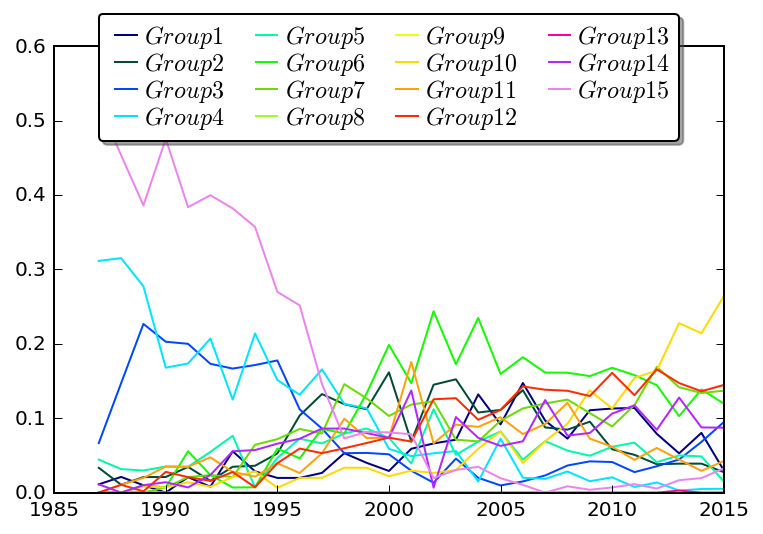

In [117]:
num_plots = K
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

# Have a look at the colormaps here and decide which one you'd like:
# http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html
colormap = plt.cm.gist_ncar
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])

# Plot several different functions...
x = np.arange(1987,2016)
labels = []
for i in range(1, num_plots + 1):
    ax1.plot(x, [groupAveragesOverYears[y][i-1] for y in range(len(groupAveragesOverYears))])
    labels.append(r'$Group %i $'%i )

# I'm basically just demonstrating several different legend options here...
ax1.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.show()